This notebook implements the k-arm bandit example given in chapter 2 and completes exercise 2.3. Finally, it seeks to replicate the results in section 2.5, 2.6 and 2.7.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [113]:
import math

In [131]:
class Bandit:
    def __init__(self, k=10, random_walk=False, mean=0):
        self.k = k
        # randomly select q(a)
        self.q = [np.random.normal(mean) for i in range(k)]
        self.optimum = np.argmax(self.q)
        self.random_walk = random_walk
    
    def pull(self, a):
        if a >= self.k or a < 0:
            raise Exception("Action out of range")
        reward, optimum = np.random.normal(self.q[a]), a== self.optimum
        if self.random_walk:
            for i in range(self.k):
                self.q[i] += np.random.normal(scale=0.1)
            self.optimum = np.argmax(self.q)
        return reward, optimum

In [119]:
class Agent:
    def __init__(self, bandit, epsilon=0, alpha=None, initial_q=0, c=0):
        self.k = bandit.k
        self.bandit = bandit
        self.epsilon = epsilon
        self.q = [initial_q for i in range(self.k)]
        self.count = [1 for i in range(self.k)]
        self.reward = []
        self.alpha = alpha
        self.c = c
        self.step_count = 0
    
    def step(self):
        self.step_count += 1
        a = np.argmax([q + self.c * (math.log(self.step_count)/self.count[i])**0.5 for i, q in enumerate(self.q)])
        if (np.random.uniform() < self.epsilon):
            a = np.random.randint(0, self.k)
        reward, optimum = self.bandit.pull(a)
        self.reward.append(reward)
        if self.alpha:
            alpha = self.alpha
        else:
            alpha = 1/self.count[a]
        self.q[a] += alpha * (reward - self.q[a])
        self.count[a] += 1
        return reward, optimum

### baseline

In [81]:
rewards = {}
optimal = {}
for epsilon in [0, 0.01, 0.1]:
    rewards[epsilon] = []
    optimal[epsilon] = []
    for i in range(2000):
        bandit = Bandit()
        agent = Agent(bandit, epsilon=epsilon)
        r = []
        o = []
        for i in range(1000):
            reward, optimum = agent.step()
            r.append(reward)
            o.append(optimum)
        rewards[epsilon].append(r)
        optimal[epsilon].append(o)
    rewards[epsilon] = np.mean(np.transpose(rewards[epsilon]),axis=1)
    optimal[epsilon] = np.mean(np.transpose(optimal[epsilon]),axis=1)

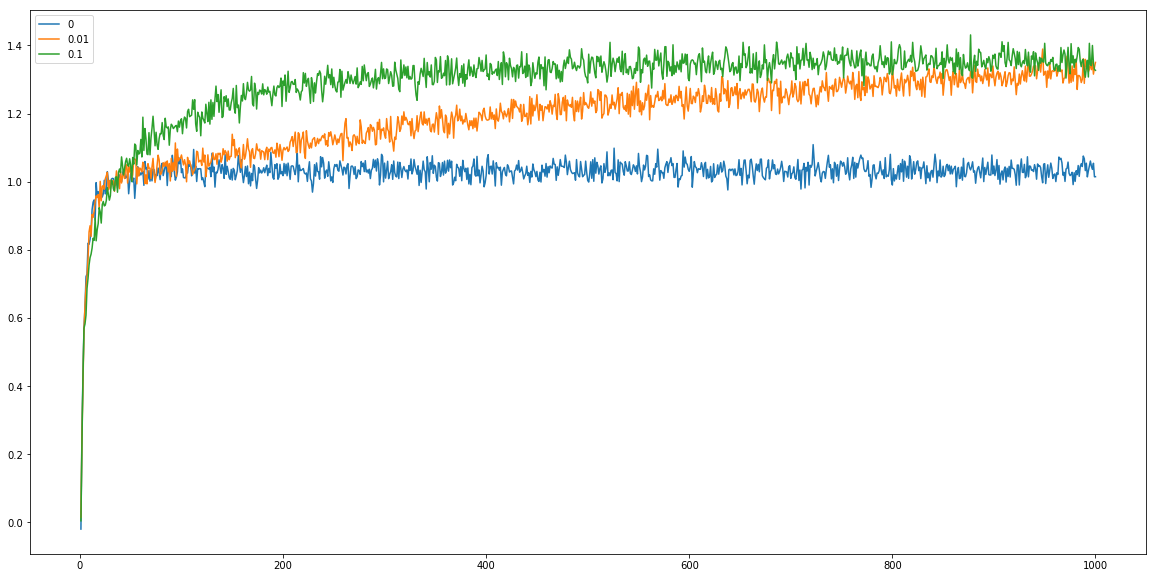

In [82]:
plt.figure(figsize=(20,10))
for epsilon in [0, 0.01, 0.1]:
    plt.plot(range(1,1001), rewards[epsilon], label=epsilon)
plt.legend()


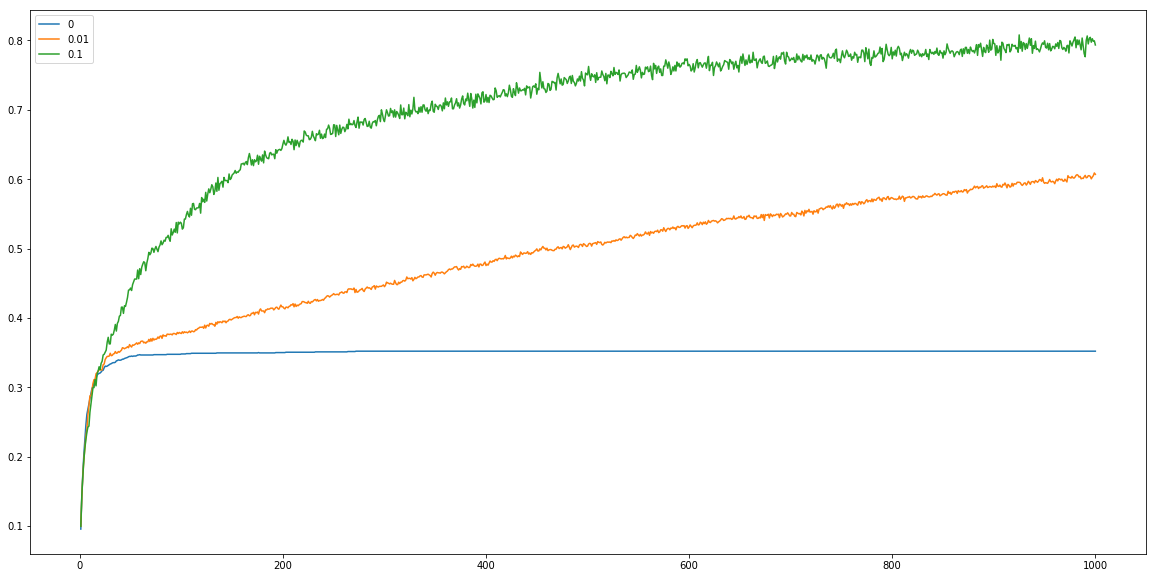

In [83]:
plt.figure(figsize=(20,10))
for epsilon in [0, 0.01, 0.1]:
    plt.plot(range(1,1001), optimal[epsilon], label=epsilon)
plt.legend()



### non stationary

In [90]:
rewards = {}
optimal = {}
for alpha in ["variable", 0.1]:
    rewards[alpha] = []
    optimal[alpha] = []
    for i in range(2000):
        bandit = Bandit(random_walk=True)
        if alpha == "variable":
            agent = Agent(bandit, epsilon=0.1)
        else:
            agent = Agent(bandit, epsilon=0.1, alpha=0.1)
        r = []
        o = []
        for i in range(2000):
            reward, optimum = agent.step()
            r.append(reward)
            o.append(optimum)
        rewards[alpha].append(r)
        optimal[alpha].append(o)
    rewards[alpha] = np.mean(np.transpose(rewards[alpha]),axis=1)
    optimal[alpha] = np.mean(np.transpose(optimal[alpha]),axis=1)

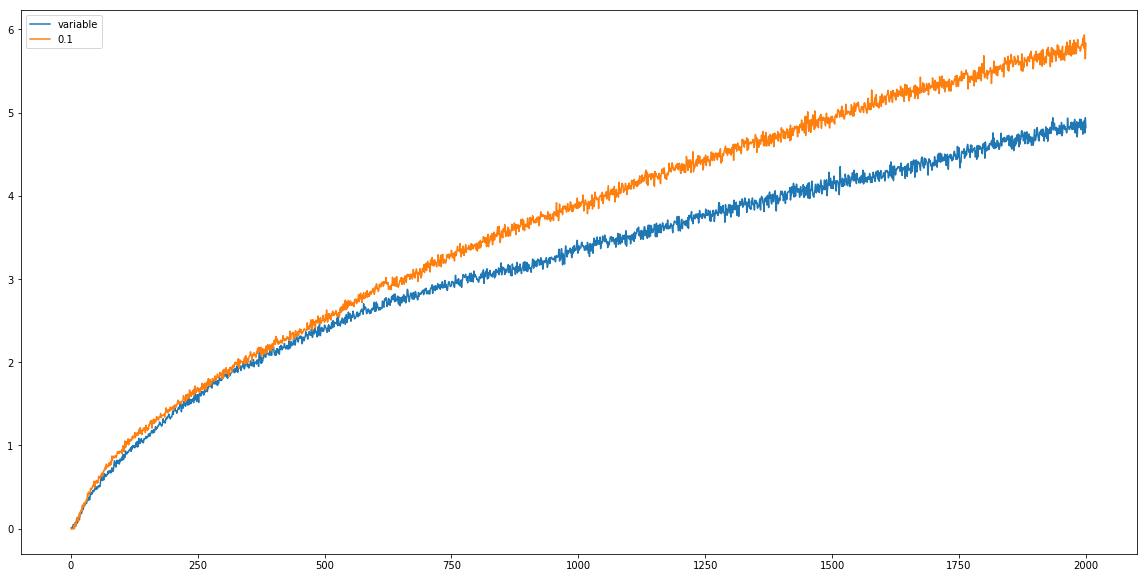

In [92]:
plt.figure(figsize=(20,10))
for alpha in ["variable", 0.1]:
    plt.plot(range(1,2001), rewards[alpha], label=alpha)
plt.legend()



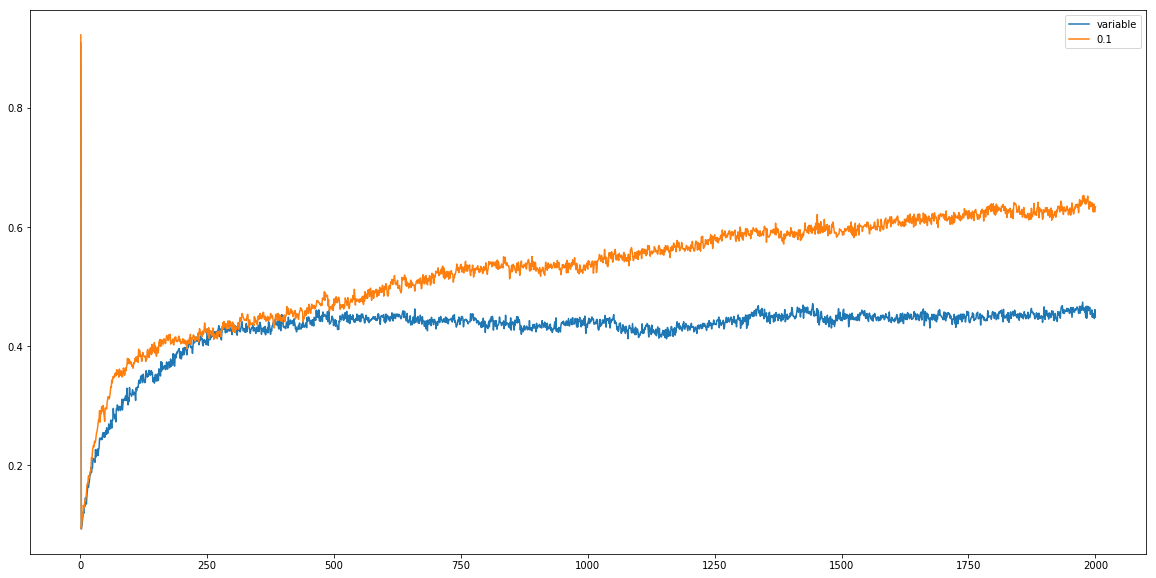

In [93]:
plt.figure(figsize=(20,10))
for alpha in ["variable", 0.1]:
    plt.plot(range(1,2001), optimal[alpha], label=alpha)
plt.legend()




### Optimistic initial value
replicating the graph shown in section 2.5

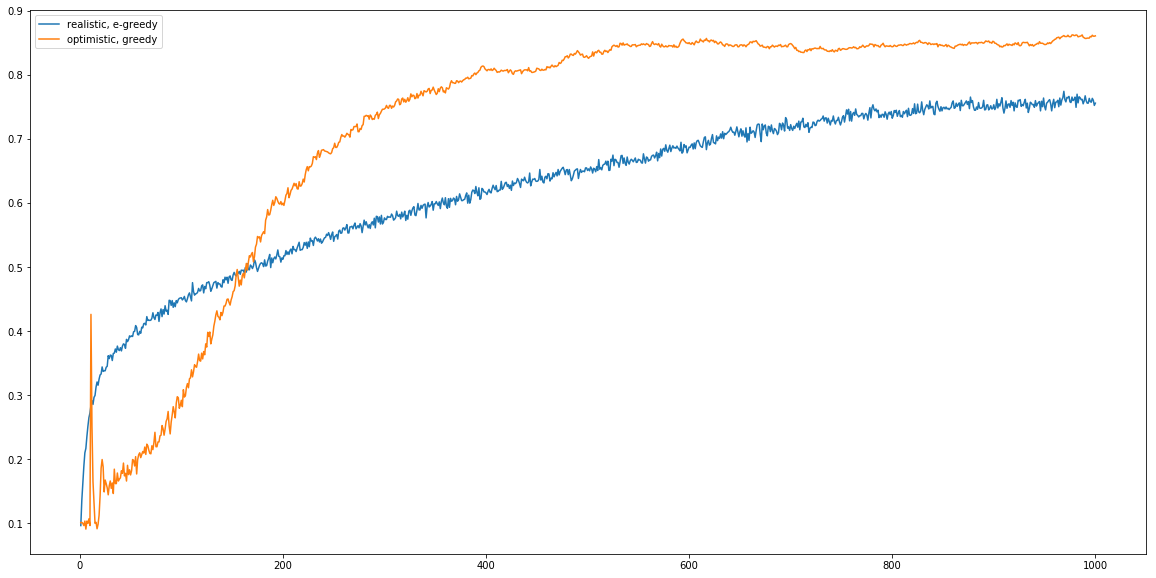

In [112]:
plt.figure(figsize=(20,10))
rewards = []
optimal = []
for i in range(2000):
    bandit = Bandit()
    agent = Agent(bandit, epsilon=0.1, initial_q=0, alpha=0.1)
    r = []
    o = []
    for i in range(1000):
        reward, optimum = agent.step()
        r.append(reward)
        o.append(optimum)
    rewards.append(r)
    optimal.append(o)
reward = np.mean(np.transpose(rewards), axis=1)
optimal = np.mean(np.transpose(optimal), axis=1)
plt.plot(range(1,1001), optimal, label="realistic, e-greedy")

# optimistic
rewards = []
optimal = []
for i in range(2000):
    bandit = Bandit()
    agent = Agent(bandit, epsilon=0, initial_q=5, alpha=0.1)
    r = []
    o = []
    for i in range(1000):
        reward, optimum = agent.step()
        r.append(reward)
        o.append(optimum)
    rewards.append(r)
    optimal.append(o)
reward = np.mean(np.transpose(rewards), axis=1)
optimal = np.mean(np.transpose(optimal), axis=1)
plt.plot(range(1,1001), optimal, label="optimistic, greedy")

plt.legend()

### Upper-Confidence-Bound Action Selection
replicating section 2.6

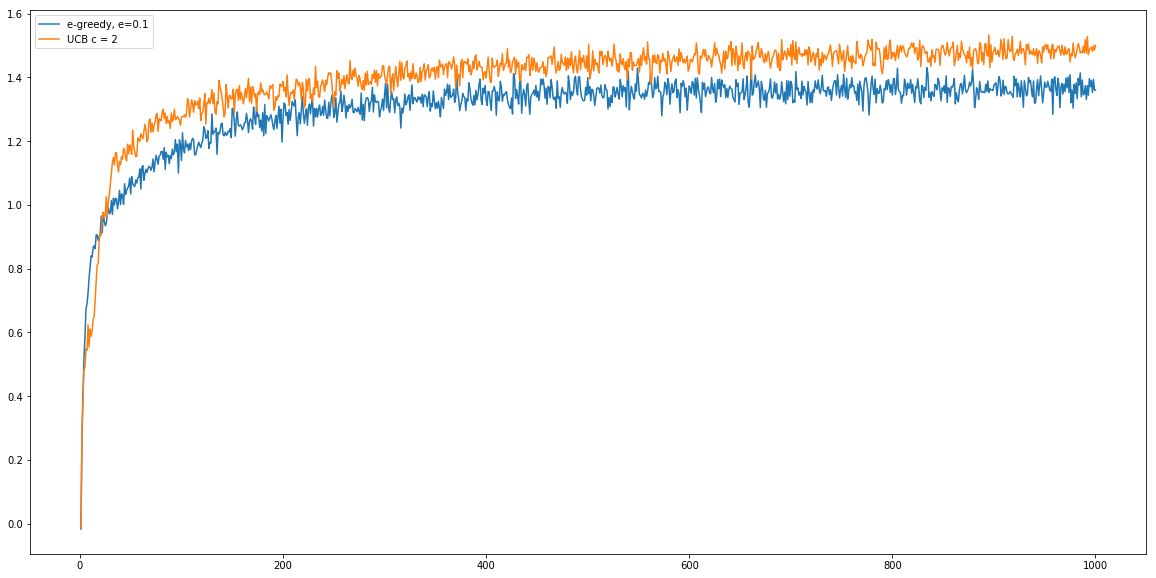

In [120]:
plt.figure(figsize=(20,10))
rewards = []
optimal = []
for i in range(2000):
    bandit = Bandit()
    agent = Agent(bandit, epsilon=0.1)
    r = []
    o = []
    for i in range(1000):
        reward, optimum = agent.step()
        r.append(reward)
        o.append(optimum)
    rewards.append(r)
    optimal.append(o)
reward = np.mean(np.transpose(rewards), axis=1)
optimal = np.mean(np.transpose(optimal), axis=1)
plt.plot(range(1,1001), reward, label="e-greedy, e=0.1")

# USB c =2
rewards = []
optimal = []
for i in range(2000):
    bandit = Bandit()
    agent = Agent(bandit, epsilon=0, c=2)
    r = []
    o = []
    for i in range(1000):
        reward, optimum = agent.step()
        r.append(reward)
        o.append(optimum)
    rewards.append(r)
    optimal.append(o)
reward = np.mean(np.transpose(rewards), axis=1)
optimal = np.mean(np.transpose(optimal), axis=1)
plt.plot(range(1,1001), reward, label="UCB c = 2")

plt.legend()

### Gradient bandit algorithm

In [135]:
class AgentGradient:
    def __init__(self, bandit, alpha, baseline=True):
        self.k = bandit.k
        self.bandit = bandit
        self.alpha = alpha
        self.timestep = 0
        self.baseline = 0
        self.H = [0 for i in range(self.k)]
        self.compute_prob()
        self.use_baseline=baseline
        
    def compute_prob(self):
        denominator = sum([math.exp(h) for h in self.H])
        self.p = [math.exp(h)/denominator for h in self.H]
    
    def step(self):
        self.timestep += 1
        a = np.random.choice(range(self.k), p=self.p)
        reward, optimum = bandit.pull(a)
        if self.use_baseline:
            self.baseline += 1/self.timestep * (reward-self.baseline)

        for action in range(self.k):
            if action == a:
                self.H[action] += self.alpha * (reward - self.baseline) * (1-self.p[action])
            else:
                self.H[action] -= self.alpha * (reward - self.baseline) * (self.p[action])
        self.compute_prob()
        return reward, optimum

In [141]:
rewards = {}
optimal = {}
for use_baseline in [True, False]:
    rewards[str(use_baseline)] = {}
    optimal[str(use_baseline)] = {}
    for alpha in [0.1, 0.4]:
        rewards[str(use_baseline)][alpha] = []
        optimal[str(use_baseline)][alpha] = []
        for i in range(2000):
            bandit = Bandit(random_walk=False, mean=4)
            agent = AgentGradient(bandit, alpha=alpha, baseline=use_baseline)
            r = []
            o = []
            for i in range(1000):
                reward, optimum = agent.step()
                r.append(reward)
                o.append(optimum)
            rewards[str(use_baseline)][alpha].append(r)
            optimal[str(use_baseline)][alpha].append(o)
        rewards[str(use_baseline)][alpha] = np.mean(np.transpose(rewards[str(use_baseline)][alpha]),axis=1)
        optimal[str(use_baseline)][alpha] = np.mean(np.transpose(optimal[str(use_baseline)][alpha]),axis=1)

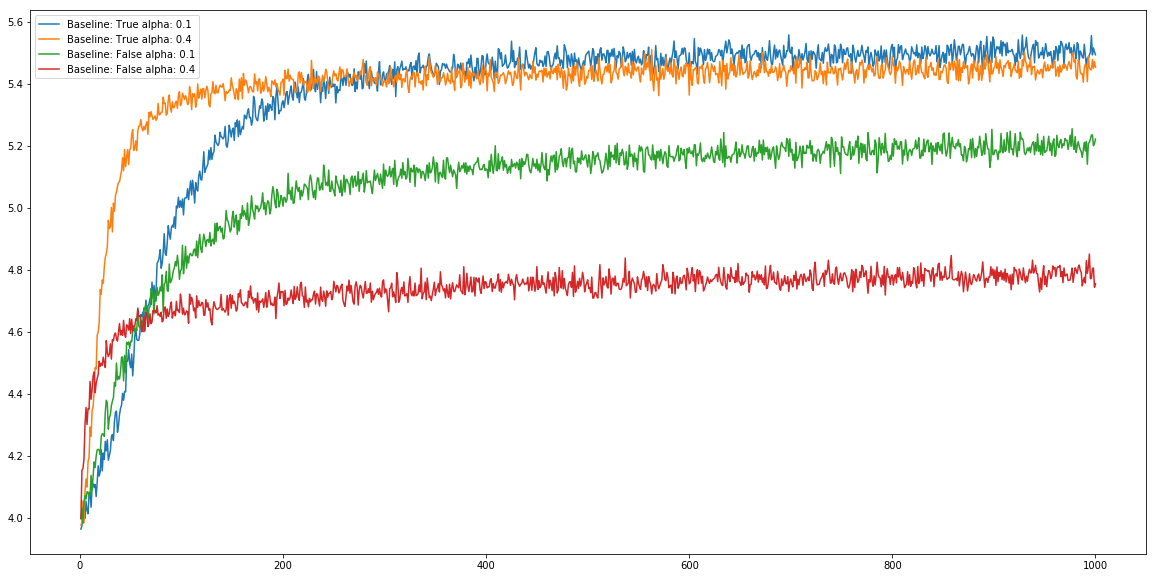

In [142]:
plt.figure(figsize=(20,10))
for use_baseline in [True, False]:
    for alpha in [0.1, 0.4]:
        plt.plot(range(1,1001), rewards[str(use_baseline)][alpha], label= "Baseline: " + str(use_baseline) + " alpha: " + str(alpha))
plt.legend()




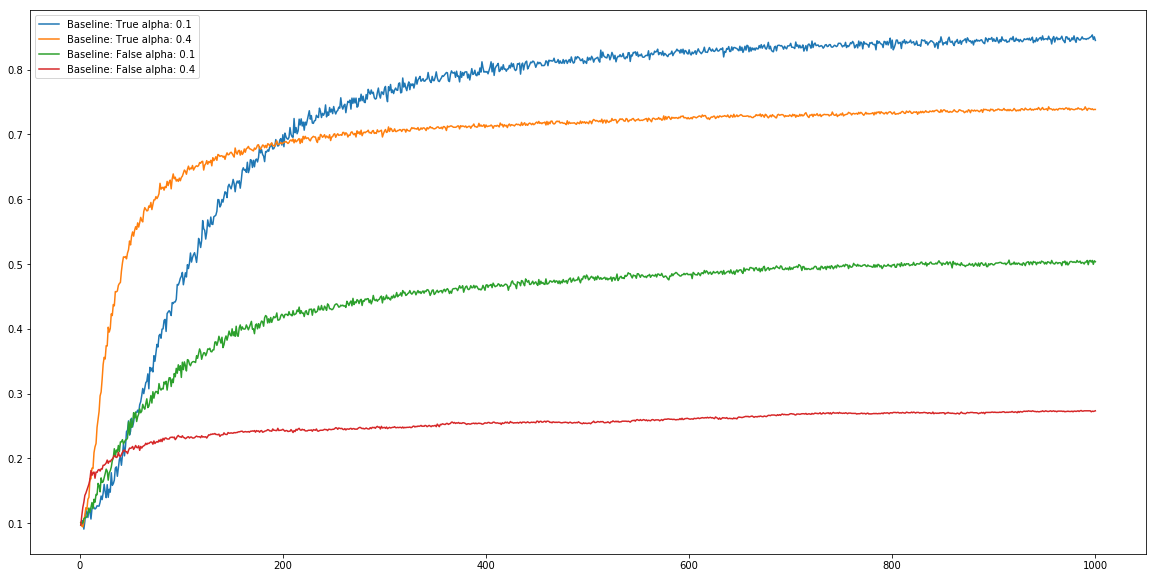

In [143]:
plt.figure(figsize=(20,10))
for use_baseline in [True, False]:
    for alpha in [0.1, 0.4]:
        plt.plot(range(1,1001), optimal[str(use_baseline)][alpha], label= "Baseline: " + str(use_baseline) + " alpha: " + str(alpha))
plt.legend()



